# Visualisation of politicians_tweets_stats.csv

This notebook provides visualisations for the different metrics provided in politicians_tweets_stats.csv

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df_tweets_stats = pd.read_csv('politicians_tweets_stats.csv')

## Analysis based on political parties

### Prepare data

In [46]:
df_tweets_stats.loc[df_tweets_stats['party'] == 'AFD', 'party'] = 'AfD'

parties = df_tweets_stats['party'].unique()
print(parties)

party_colors = {
    'SPD': 'red',
    'CDU': 'black',
    'AfD': 'blue',
    'FDP': 'yellow',
    'Bündnis 90/Die Grünen': 'green',
    'Die Linke': 'purple',
    'CSU': 'lightblue',
    'Fraktionslos': 'grey'
}

['CDU' 'SPD' 'Bündnis 90/Die Grünen' 'CSU' 'Die Linke' 'Fraktionslos'
 'FDP' 'AfD']


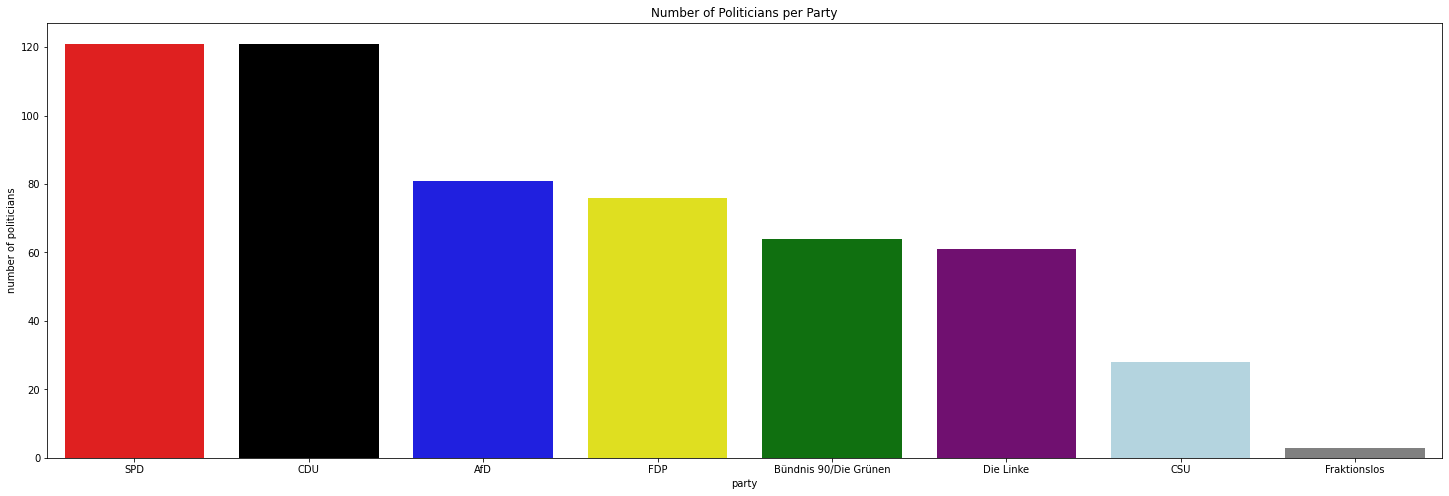

In [47]:
fig = plt.figure(figsize=(25, 8))
chart = sns.countplot(data=df_tweets_stats,
                      x='party',
                      order=df_tweets_stats['party'].value_counts().index,
                      palette=party_colors)
chart.set(ylabel='number of politicians',
          title='Number of Politicians per Party')
plt.show()

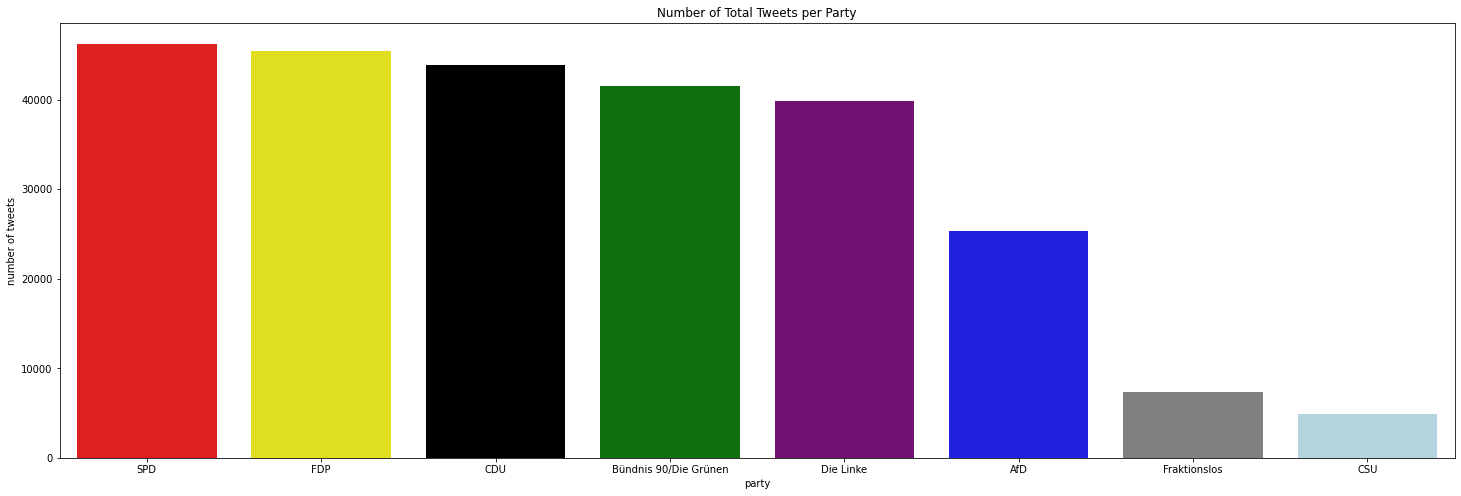

In [48]:
df_tweets_per_party = df_tweets_stats[['party','tweets_by_politician']].groupby(['party']).sum()
df_tweets_per_party.reset_index(inplace=True)
df_tweets_per_party = df_tweets_per_party.rename(columns={'tweets_by_politician': 'tweets_per_party'})
fig = plt.subplots(figsize=(25, 8))
chart = sns.barplot(data=df_tweets_per_party,
                    x='party',
                    y='tweets_per_party',
                    order=df_tweets_per_party.sort_values('tweets_per_party', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='number of tweets',
          title='Number of Total Tweets per Party')
plt.show()

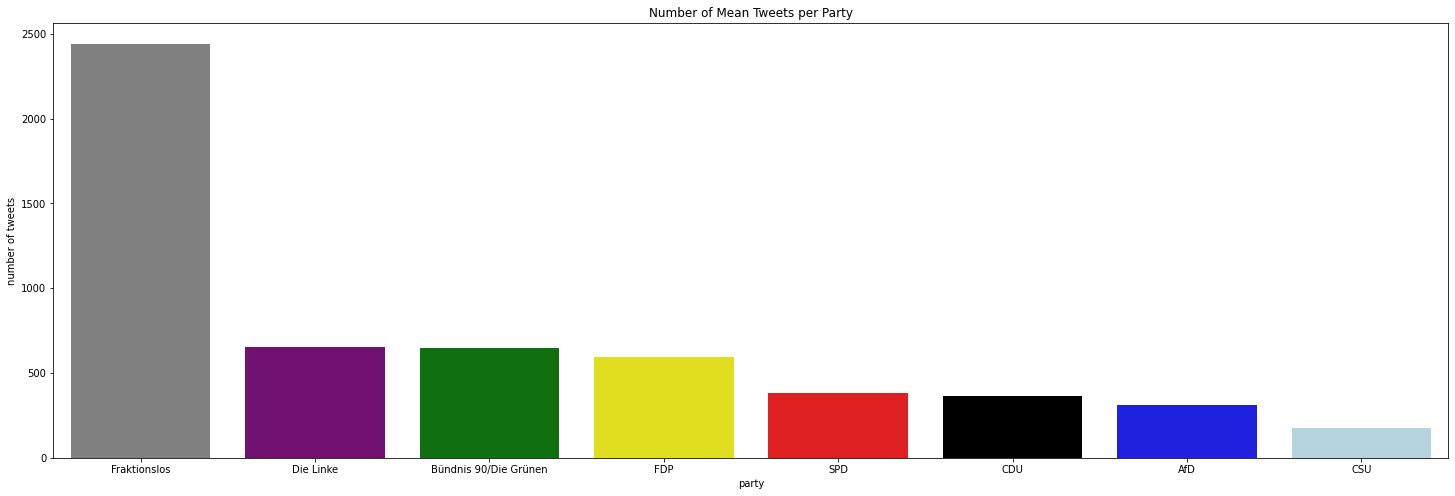

In [54]:
df_tweets_per_party = df_tweets_stats[['party','tweets_by_politician']].groupby(['party']).mean()
df_tweets_per_party.reset_index(inplace=True)
df_tweets_per_party = df_tweets_per_party.rename(columns={'tweets_by_politician': 'tweets_per_party'})
fig = plt.subplots(figsize=(25, 8))
chart = sns.barplot(data=df_tweets_per_party,
                    x='party',
                    y='tweets_per_party',
                    order=df_tweets_per_party.sort_values('tweets_per_party', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='number of tweets',
          title='Number of Mean Tweets per Party')
plt.show()

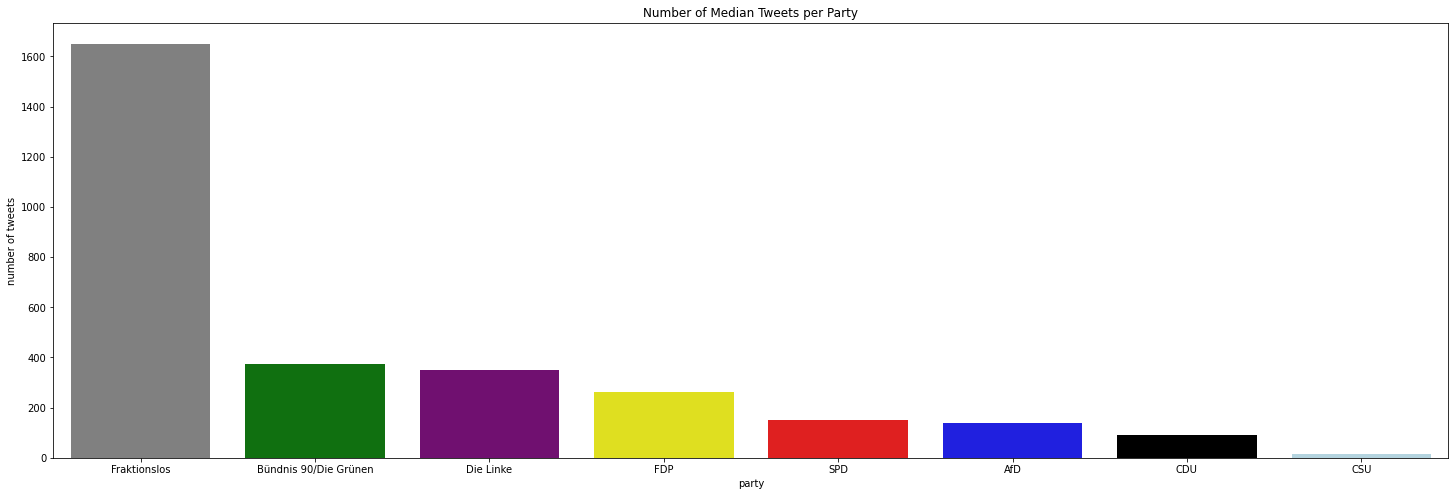

In [53]:
df_tweets_per_party = df_tweets_stats[['party','tweets_by_politician']].groupby(['party']).median()
df_tweets_per_party.reset_index(inplace=True)
df_tweets_per_party = df_tweets_per_party.rename(columns={'tweets_by_politician': 'tweets_per_party'})
fig = plt.subplots(figsize=(25, 8))
chart = sns.barplot(data=df_tweets_per_party,
                    x='party',
                    y='tweets_per_party',
                    order=df_tweets_per_party.sort_values('tweets_per_party', ascending=False).party,
                    palette=party_colors)
chart.set(ylabel='number of tweets',
          title='Number of Median Tweets per Party')
plt.show()

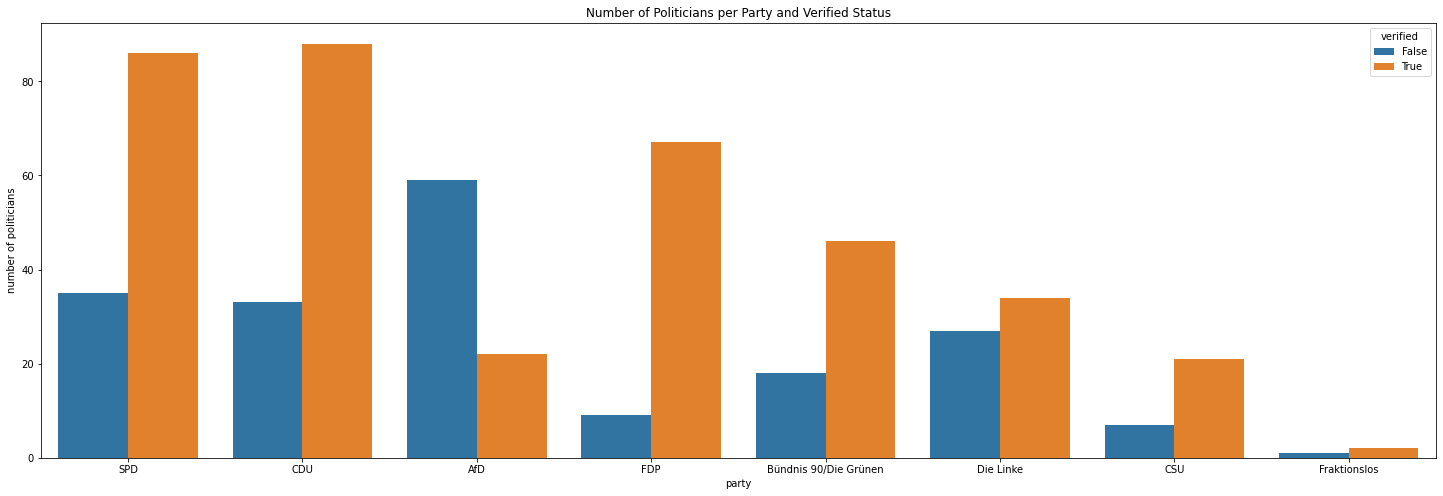

In [49]:
fig = plt.figure(figsize=(25, 8))
chart = sns.countplot(data=df_tweets_stats,
                      x='party',
                      hue='verified',
                      order = df_tweets_stats['party'].value_counts().index)
chart.set(ylabel='number of politicians',
          title='Number of Politicians per Party and Verified Status')
plt.show()

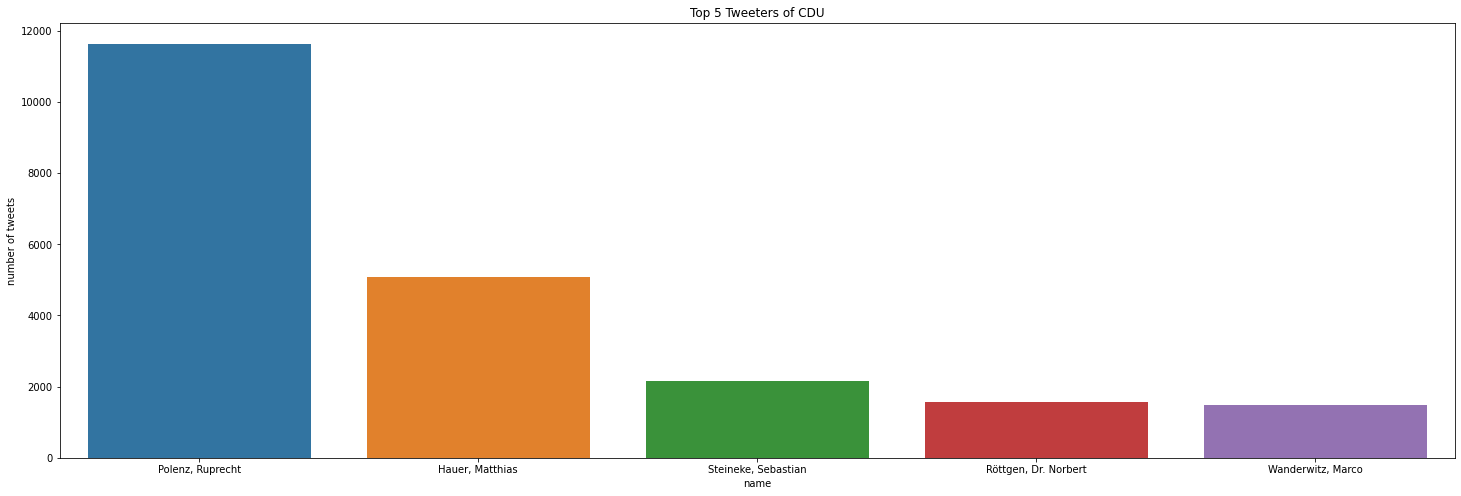

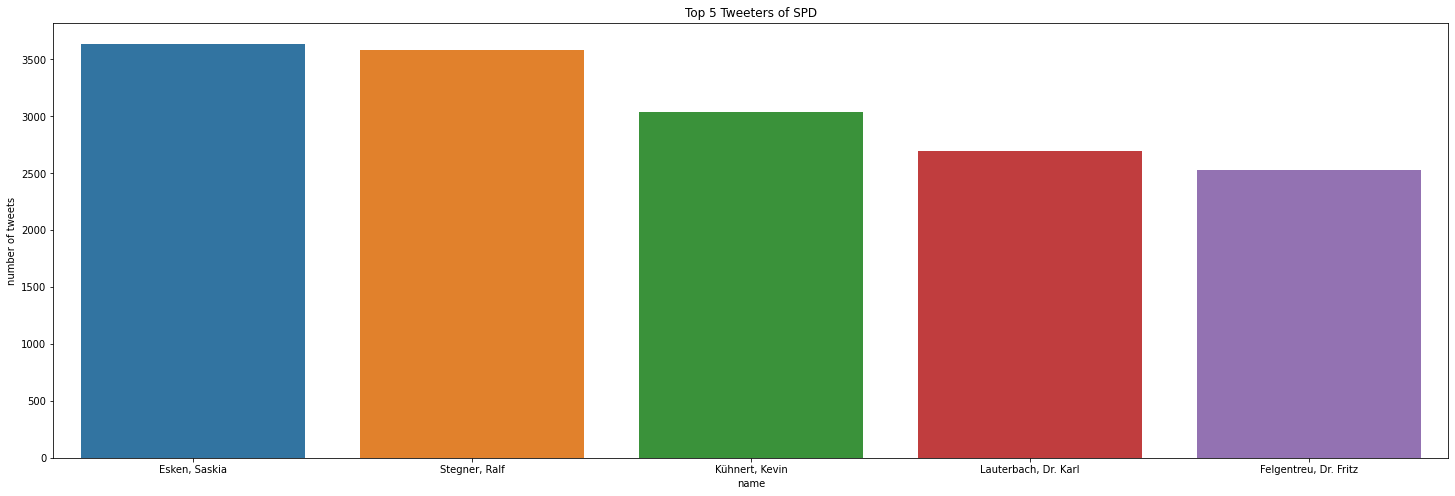

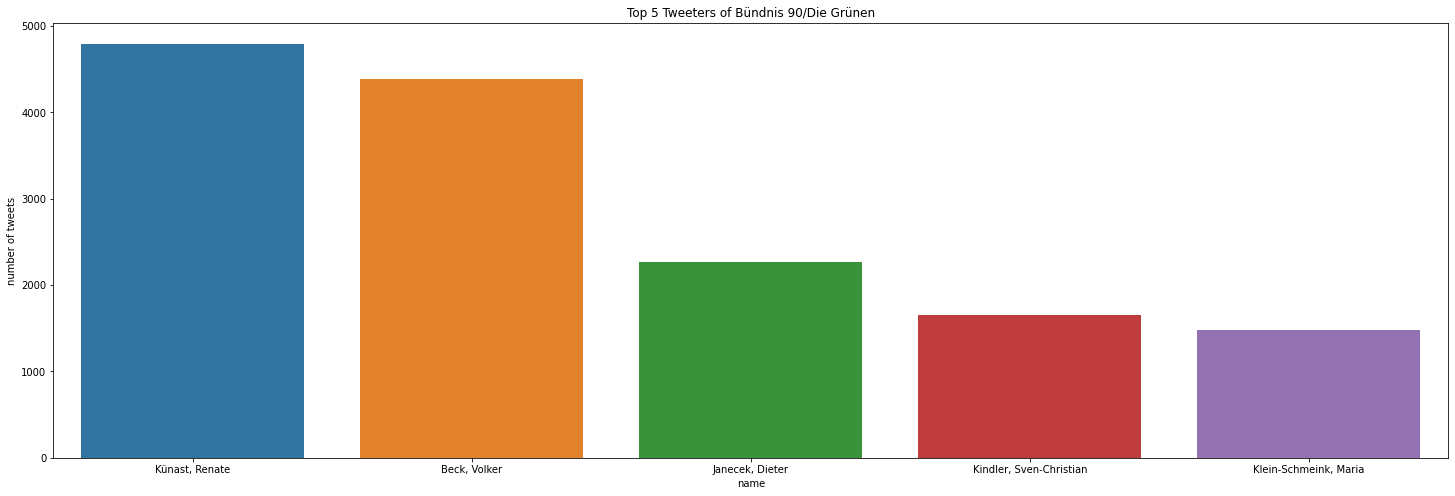

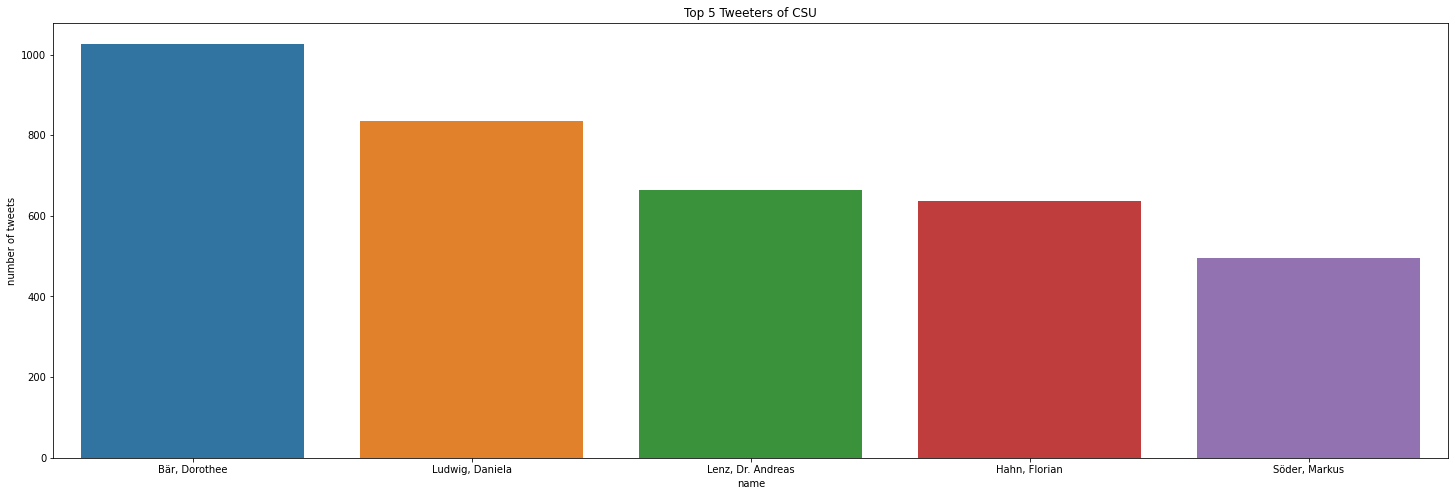

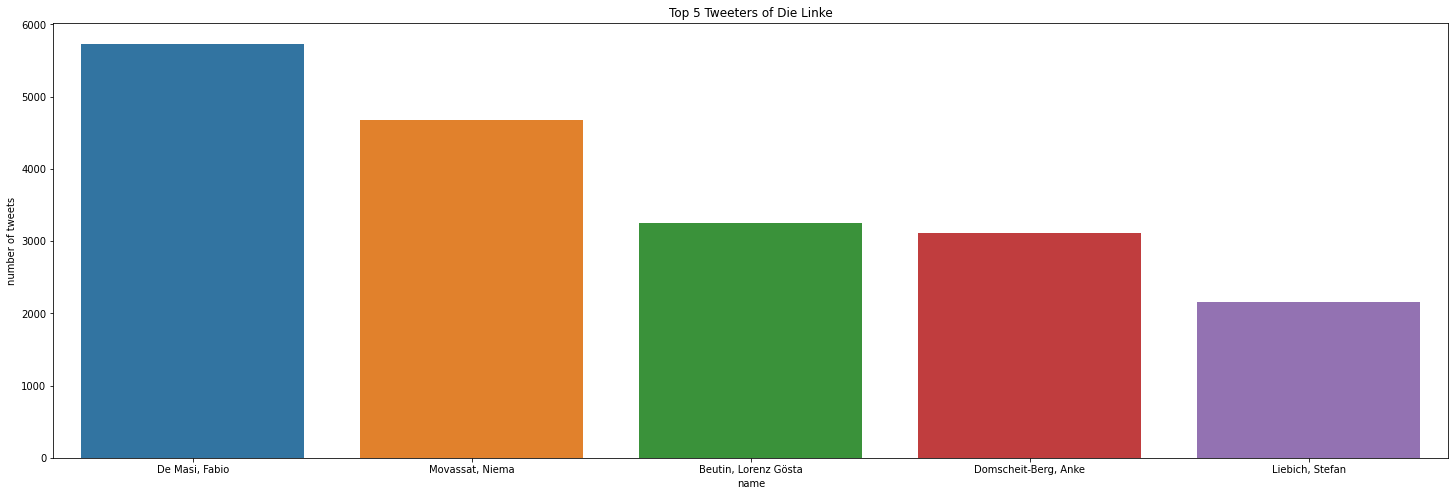

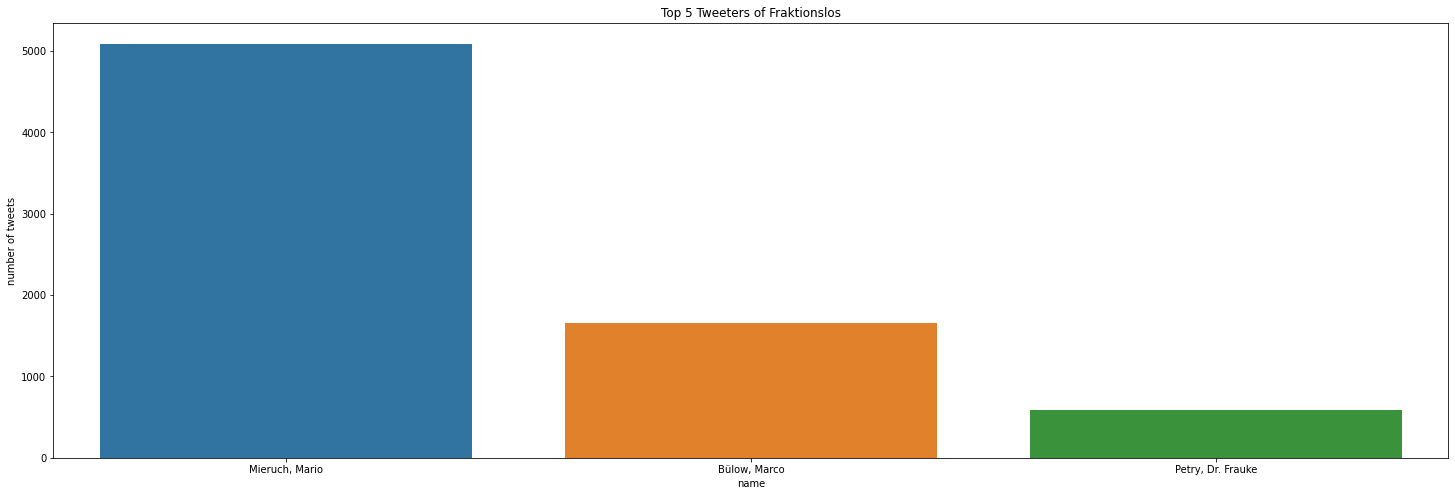

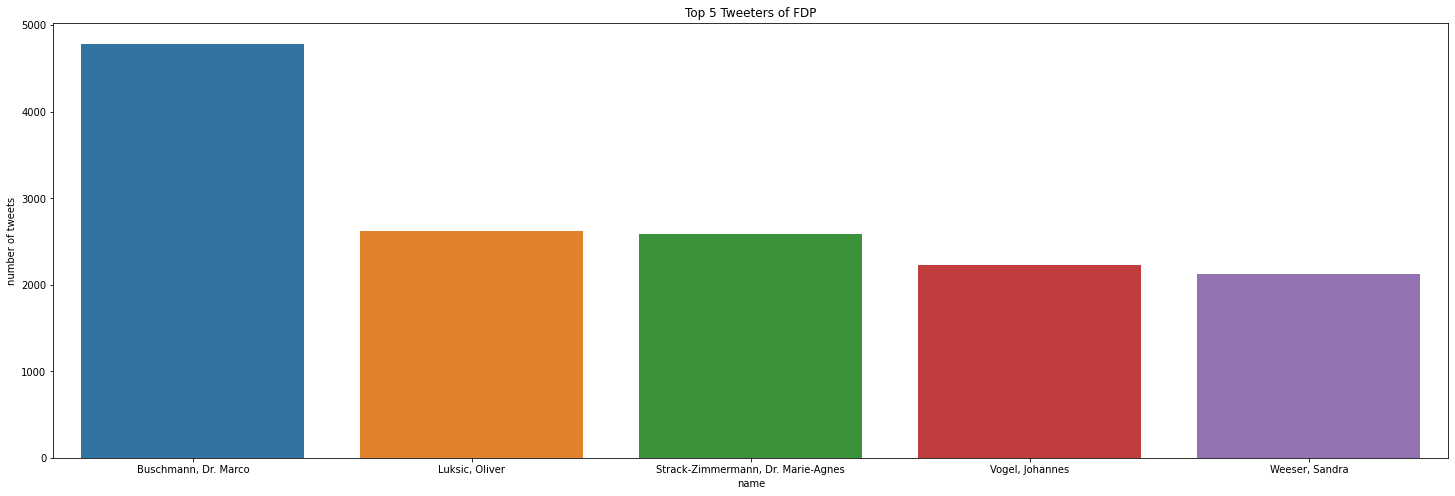

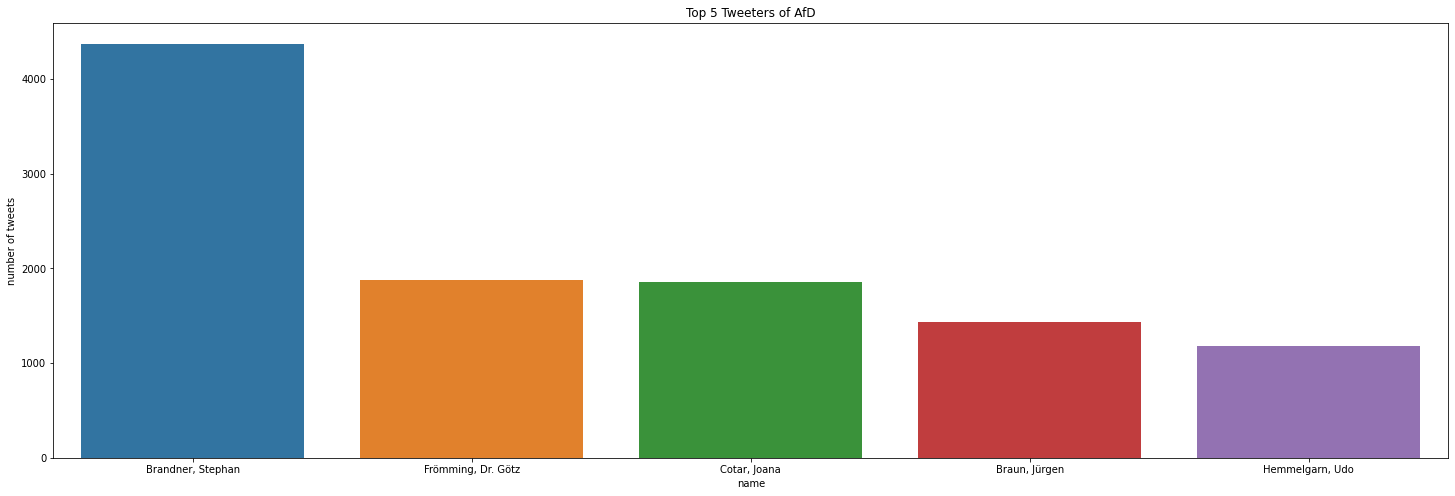

In [50]:
number_of_top_tweeters = 5
for p in parties:
    politicians_per_party = df_tweets_stats[df_tweets_stats['party'] == p].sort_values(by='tweets_by_politician', ascending=False).head(number_of_top_tweeters)
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='tweets_by_politician')
    chart.set(ylabel='number of tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p}')
    plt.show()

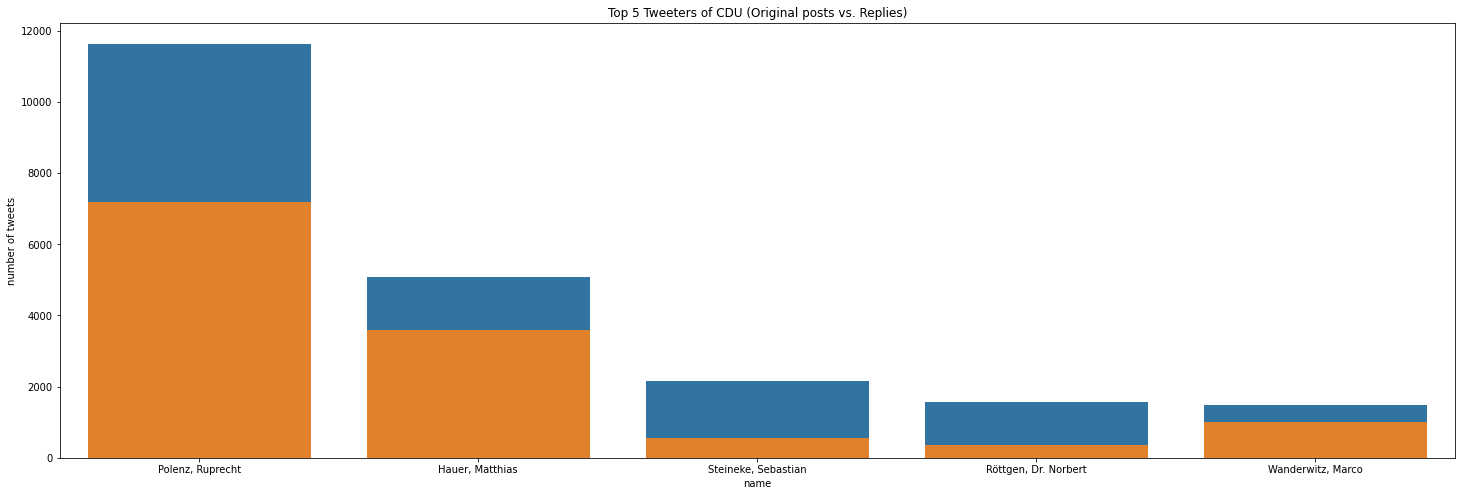

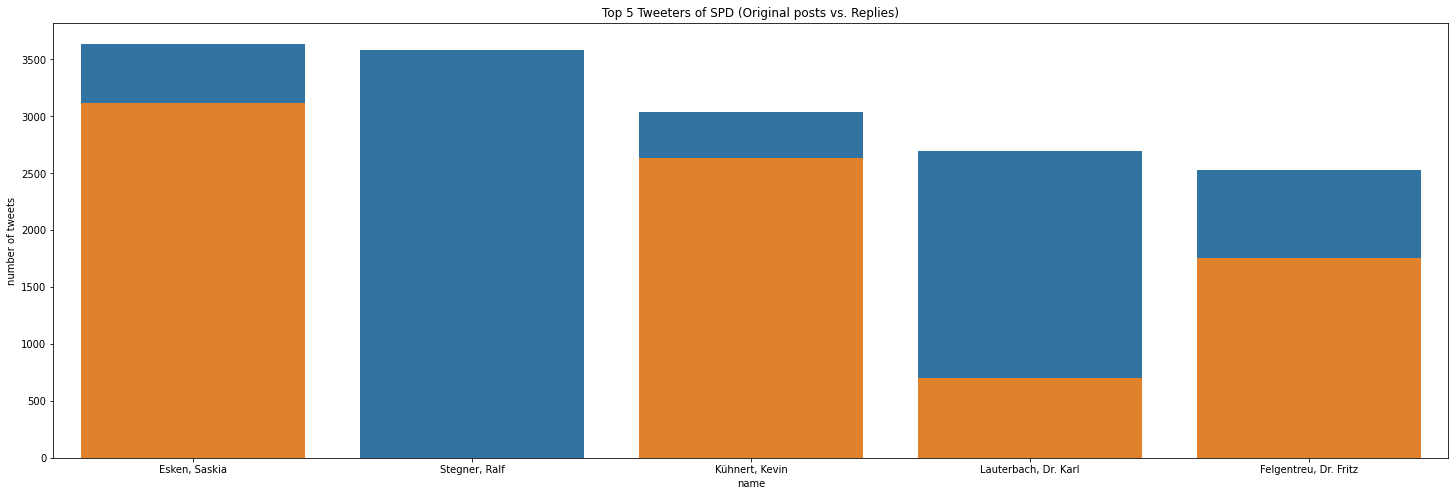

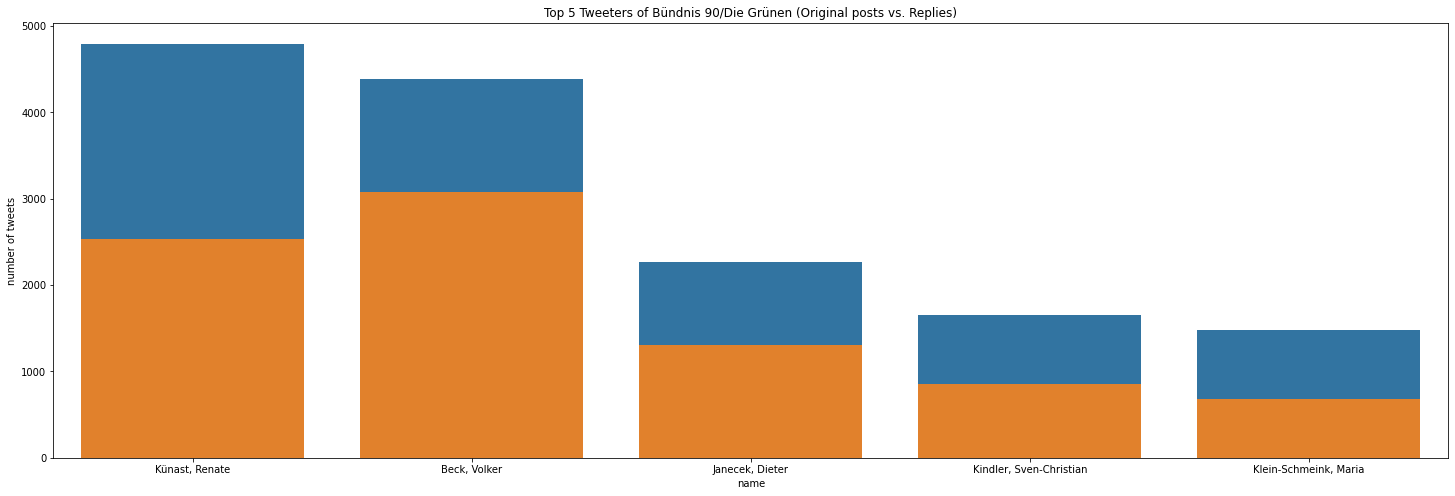

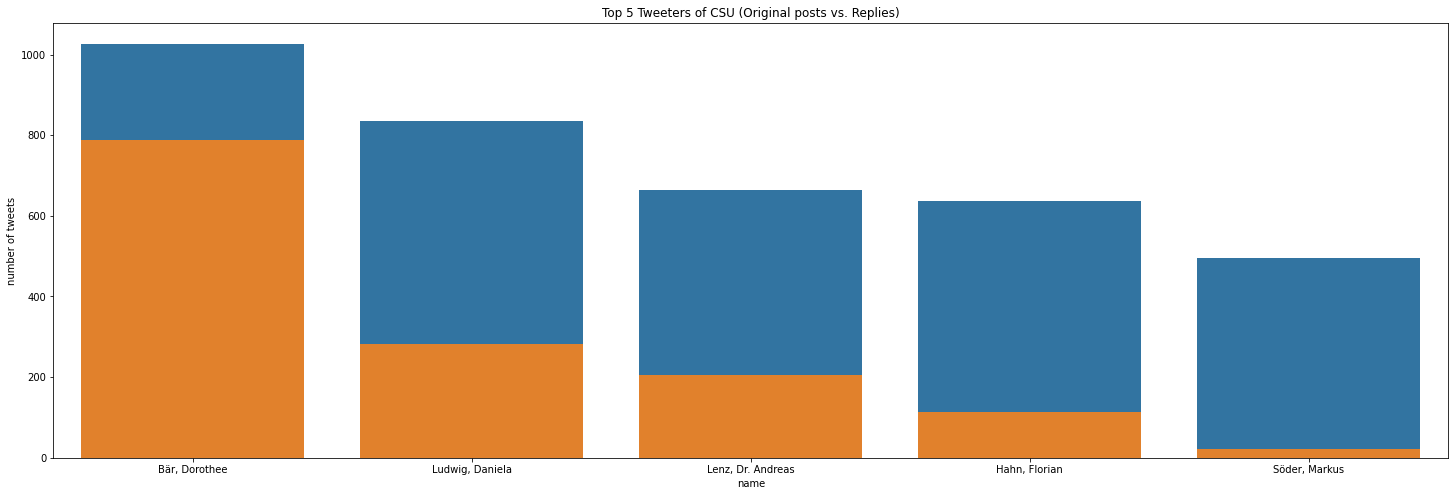

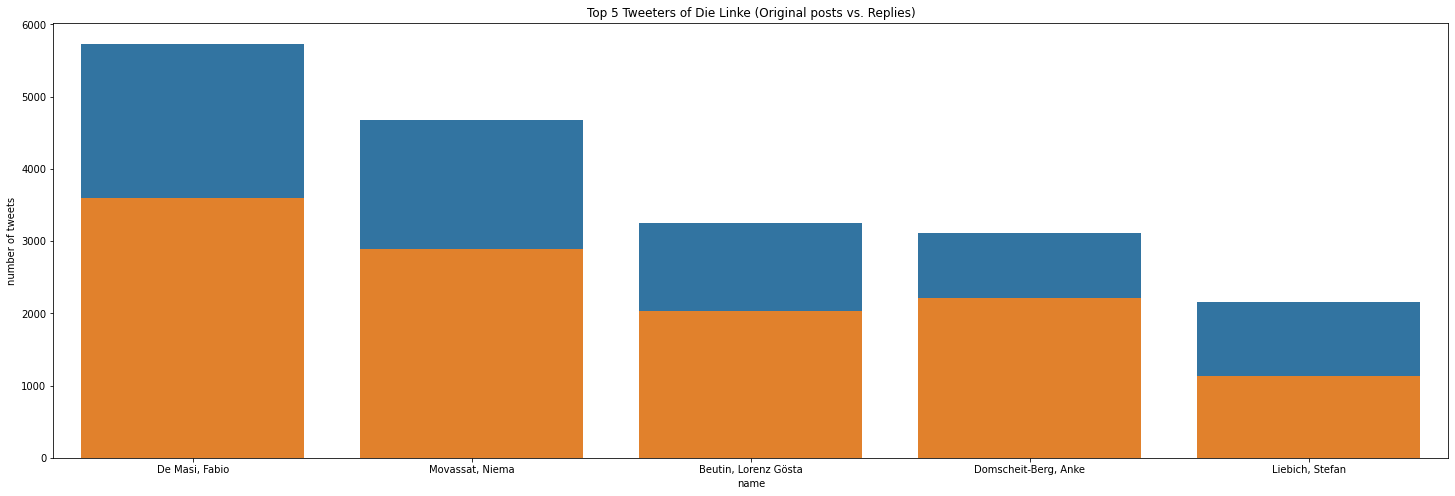

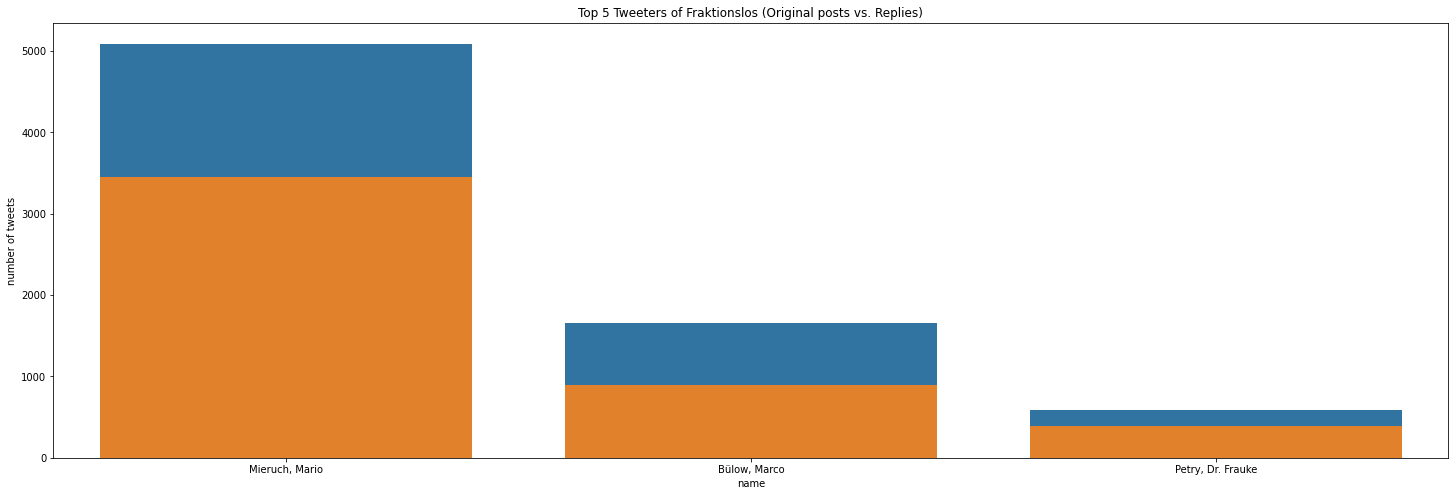

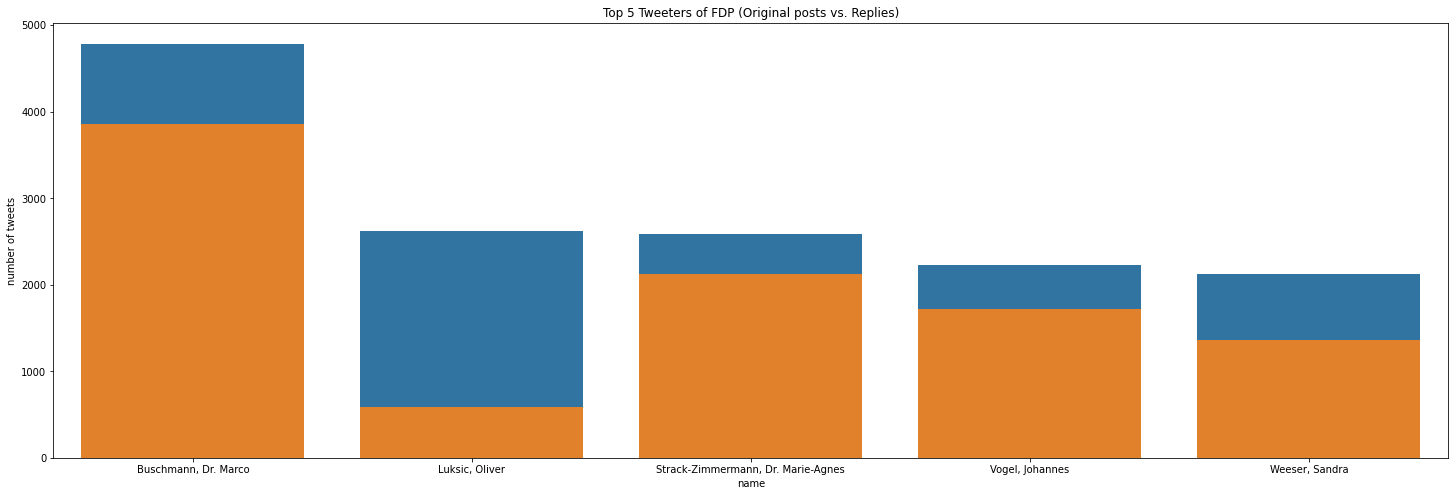

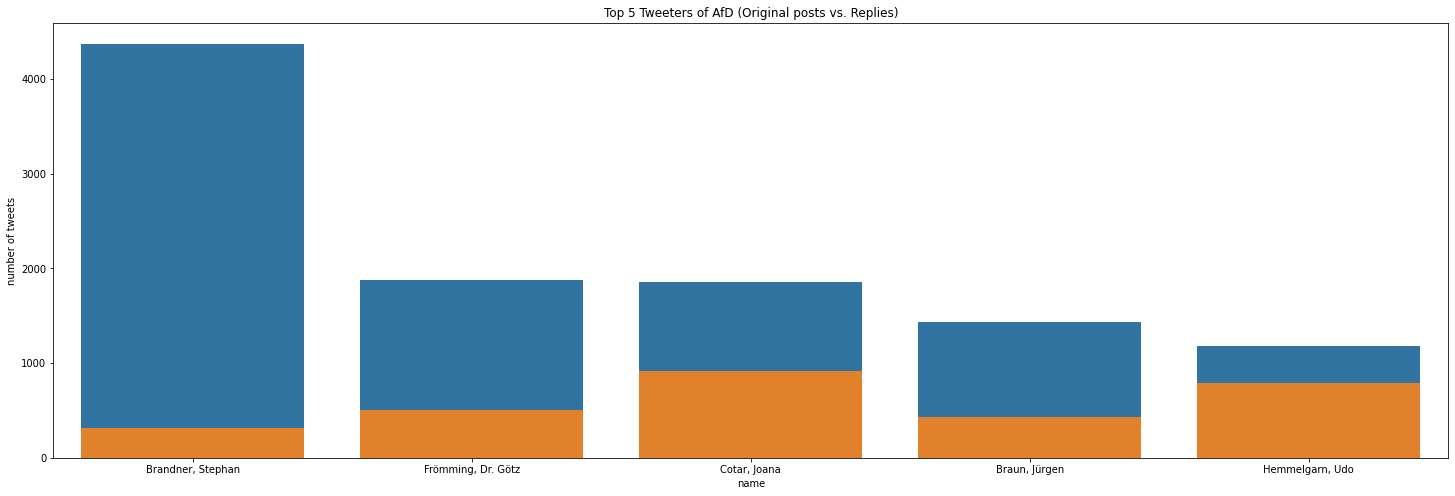

In [51]:
number_of_top_tweeters = 5
for p in parties:
    politicians_per_party = df_tweets_stats[df_tweets_stats['party'] == p].sort_values(by='tweets_by_politician', ascending=False).head(number_of_top_tweeters)
    fig = plt.figure(figsize=(25, 8))
    chart = sns.barplot(data=politicians_per_party,
                        x='name',
                        y='tweets_by_politician',
                        color='tab:blue')
    sns.barplot(data=politicians_per_party,
                        x='name',
                        y='replies_by_politician',
                        color='tab:orange')
    chart.set(ylabel='number of tweets',
              title=f'Top {number_of_top_tweeters} Tweeters of {p} (Original posts vs. Replies)')
    plt.show()